## 概率

### 基本概率论

In [8]:
%matplotlib inline
import torch
from torch.distributions import multinomial  ## distribution分布， 

fair_probs = torch.ones([6])
multinomial.Multinomial(1, fair_probs).sample() ## 次数， 概率权重

tensor([0., 0., 0., 0., 1., 0.])

In [9]:
multinomial.Multinomial(10,  fair_probs).sample()

tensor([2., 4., 2., 1., 0., 1.])

**大数定理**

In [10]:
counts = multinomial.Multinomial(1000, fair_probs).sample()
counts / 1000

tensor([0.1890, 0.1430, 0.1800, 0.1640, 0.1750, 0.1490])

**500组实验**

In [22]:
counts = multinomial.Multinomial(10, fair_probs).sample((500,)) 
# 500 组实验，每次投10次
cum_counts = counts.cumsum(dim=0)
estimates = cum_counts / cum_counts.sum(dim=1, keepdims=True)
counts.shape

torch.Size([500, 6])

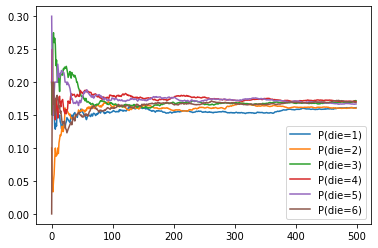

In [23]:
import matplotlib.pyplot as plt
for i in range(6):
    plt.plot(estimates[:, i].numpy(), label=("P(die=" + str(i + 1) + ")"))
plt.legend();

### 概率论公理

![截屏2022-06-08 03.23.52](https://ghproxy.com/https://github.com/Maserhe/PIc-Bed/blob/master/typora/202206080324684.png)

- **联合概率**：多个事情，可以回答A=a和B=b同时满足时的概率
- **条件概率**：可以用来表示联合概率的情况
- **贝叶斯定理**： 
- **边际化**： 进行事件概率求和
- **独立性**： 用来表示两个事件的关系，是独立还是 依赖的关系
 - P(A,B) = P(A) * P(B) 表示是A和B是独立的

## 期望和方差

**差的平方根就是标准差**